In [78]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('thread_csv_all.csv')
df.shape

(54057, 70)

Class 0: 44157
Class 1: 9900
Proportion: 4.46 : 1


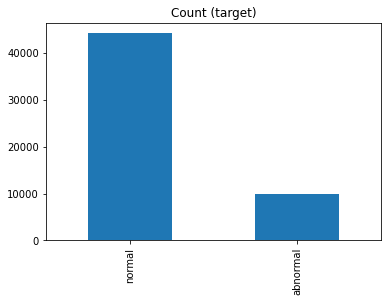

In [94]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [95]:
#df_test = df[df['machine_type'] == 'valve']

In [96]:
# data prprocessing

df_test = df.iloc[:,5:df.shape[1]]
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)
df_test = df_test.astype({"target": int})
y = df_test['target']
df_test = df_test.drop('target', 1)

In [97]:
df_test.shape

(54057, 64)

In [98]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.2,
    random_state=100
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(43245, 64) (43245,)
(10812, 64) (10812,)


In [99]:
from imblearn.ensemble import BalancedRandomForestClassifier
balanced_random_forest = BalancedRandomForestClassifier(n_estimators = 100, random_state=50)

In [ ]:
balanced_random_forest.fit(X_train, Y_train)

In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
from sklearn.model_selection import cross_val_score
# 10-Fold Cross validation
print(np.mean(cross_val_score(balanced_random_forest, X_train, Y_train, cv=cv)))

0.9141095645757247


In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

roc = plot_roc_curve(balanced_random_forest, X_test, Y_test)

In [90]:
y_pred = balanced_random_forest.predict(X_test_valid)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_valid,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7078
           1       0.89      1.00      0.94      1571

    accuracy                           0.98      8649
   macro avg       0.94      0.99      0.96      8649
weighted avg       0.98      0.98      0.98      8649



In [92]:
import pickle
# Save models
filename = 'model.sav'
pickle.dump(balanced_random_forest, open(filename, 'wb'))